In [1]:
import os
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from ast import literal_eval

# Load fitting data

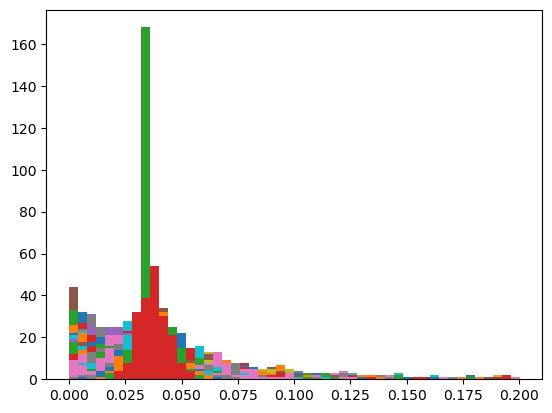

In [5]:
number_of_bins=50

current_wd=os.getcwd()
fitDataFolder=os.path.join(current_wd, 'RegressionData')
subfolders_fitDataFolder = [ f.path for f in os.scandir(fitDataFolder) if f.is_dir() ]
lambda_list=list()
weights_list=list()
for subfolder in subfolders_fitDataFolder:
    weight_file=[ str(f.path) for f in os.scandir(subfolder) if str(f.path).endswith('HeteroSynapses.dat') ][0]
    weights_table=pd.read_table(weight_file, comment='#').iloc[::,1:-1].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[1]).astype('float32').values[0]
    if weights_table[0] == weights_table[-1] and weights_table[1] == weights_table[-2]:
        continue
    #weights_table.sort()
    lambda_list.append(float(os.path.basename(subfolder).split('_')[6]))
    weights_list.append(list(weights_table))
fit_data=pd.DataFrame(lambda_list, columns=['lambdas'])
fit_data['weightData']=weights_list

_,bins,_=plt.hist(fit_data.iloc[25,-1], bins=number_of_bins)
list_of_histograms=list()
for i in range(0, len(fit_data['weightData'])):
    histogram,_,_=plt.hist(fit_data.iloc[i,-1], bins=bins)
    list_of_histograms.append(list(histogram.tolist()))
fit_data['binData']=list_of_histograms

cols=['binData']
df1 = pd.concat([pd.DataFrame(fit_data[x].values.tolist()).add_prefix(x) for x in cols], axis=1)
fit_data = pd.concat([df1, fit_data.drop(cols, axis=1)], axis=1)
fit_data.to_csv('fitting_data.csv')


## Load testing data

In [12]:
testDataFolder=os.path.join(current_wd, 'TestData')
subfolders_testDataFolder = [ f.path for f in os.scandir(testDataFolder) if f.is_dir() ]
weights_list=list()
#The 5d7 0d0
subfolder=subfolders_testDataFolder[0]
weight_file=[str(f.path) for f in os.scandir(subfolder) if str(f.path).endswith('HeteroSynapses.dat') ][0]
temp_data5d70d0=pd.read_table(weight_file, comment='#').iloc[::,1:-1].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[1]).astype('float32')
time_df=pd.read_table(weight_file, comment='#').iloc[::,0]
lambda_list_len=round(len(time_df)/2)
lambda_list=[5.7]*lambda_list_len
lambda_list.extend([0.0]*lambda_list_len)

list_of_histograms=list()
for i in range(0, len(time_df)):
    histogram,_,_=plt.hist(temp_data5d70d0.iloc[i,::], bins=bins)
    list_of_histograms.append(list(histogram.tolist()))

test_data5d70d0=pd.DataFrame(list_of_histograms, columns=['allHistograms'])
test_data5d70d0['lambdas']=lambda_list
test_data5d70d0['time']=time_df

cols=['allHistograms']
df1 = pd.concat([pd.DataFrame(test_data5d70d0[x].values.tolist()).add_prefix(x) for x in cols], axis=1)
fit_data = pd.concat([df1, test_data5d70d0.drop(cols, axis=1)], axis=1)
test_data5d70d0.to_csv('test_data5d70d0.csv')



#fit_data=pd.DataFrame(lambda_list, columns=['lambdas'])
#fit_data['weightData']=weights_list

In [ ]:
subfolder=subfolders_testDataFolder[1]
weight_file=[str(f.path) for f in os.scandir(subfolder) if str(f.path).endswith('HeteroSynapses.dat') ][0]
test_data8d94d6=pd.read_table(weight_file, comment='#').iloc[::,1:-1].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[1]).astype('float32')
time_df=pd.read_table(weight_file, comment='#').iloc[::,0]
lambda_list_len=round(len(time_df)/2)
lambda_list=[8.9]*lambda_list_len
lambda_list.extend([4.6]*lambda_list_len)

list_of_histograms=list()
for i in range(0, len(time_df)):
    histogram,_,_=plt.hist(fit_data.iloc[i,::], bins=bins)
    list_of_histograms.append(list(histogram.tolist()))

test_data8d94d6=pd.DataFrame(list_of_histograms, columns=['allHistograms'])
test_data8d94d6['lambdas']=lambda_list
test_data8d94d6['time']=time_df

cols=['allHistograms']
df1 = pd.concat([pd.DataFrame(test_data8d94d6[x].values.tolist()).add_prefix(x) for x in cols], axis=1)
fit_data = pd.concat([df1, test_data8d94d6.drop(cols, axis=1)], axis=1)
test_data8d94d6.to_csv('test_data5d70d0.csv')

In [26]:

fit_data=pd.read_csv('fitting_data.csv', index_col=0)
fit_data['weightData']=fit_data['weightData'].map(literal_eval)
test_data5d70d0=pd.read_csv('test_data5d70d0.csv', index_col=0)
test_data8d94d6=pd.read_csv('test_data8d94d6.csv', index_col=0)
#fit_data['weightData']=fit_data['weightData'].map(literal_eval)

## Fitting

In [30]:
X_fit=pd.DataFrame(fit_data.drop(columns=['lambdas', 'weightData']))
Y_fit=fit_data['lambdas']

regression=linear_model.LinearRegression()
regression.fit(X_fit, Y_fit)

AttributeError: module 'sklearn' has no attribute 'linear_model'